# Convolutional neural network (CNN) for digit classification (MNIST)

In this example, we use the MNIST dataset of handwritten digits and apply a convolutional neural network (CNN) to classify the digits.

As usual, we first import some modules.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

And we load the dataset.

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Let us have a closer look at the dataset, first by looking at the `shape` of the arrays, and then by plotting the images.

(28, 28)


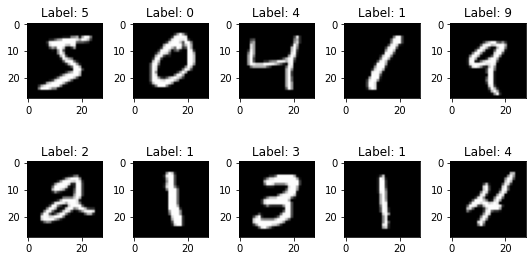

In [3]:
print(x_train[1].shape)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_row = 2
num_col = 5
# Plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

Let us preprocess the data a little bit.

In [4]:
# Scale the "grayscale" between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("y_train shape:", y_train.shape)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train[0:10])

# Model / data parameters
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0:10])

y_train shape: (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


We can now define our model:
- taking images of 28x28 with a "depth" from 0 to 1
- using a convolutional layer of 32 nodes with a 3x3 convolution and a ReLU activation function
- using a pooling layer of 2x2 (max)
- using another conv layer of 64 nodes (same settings) with a 2x2 (max) pooling
- we then flatten the output to achieve the classification
- we use a 50% dropout rate (as we have 1600 nodes going into 10)
- we finally have our output layer of 10 classes and use a softmax activation (to ensure the sum of probabilities is 1)

In [5]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Shows a nice summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

Now let's train our model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 35ms/step - loss: 0.7526 - accuracy: 0.7714 - val_loss: 0.0795 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 18s 44ms/step - loss: 0.1121 - accuracy: 0.9660 - val_loss: 0.0541 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0847 - accuracy: 0.9739 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0398 - val_accuracy: 0.9900
Epoch 5/15
422/422 [==============================] - 21s 51ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 22s 51ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0510 - accuracy: 0.9835 - val_loss: 0.0346 - val_accuracy:

Finally, we evaluate the model.

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022671198472380638
Test accuracy: 0.9925000071525574
